In [14]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [15]:
df = pd.read_csv("db/results_complete_df_2015_to_2018.csv",parse_dates=True).dropna().drop("meet_date",axis=1).drop("datetime",axis=1)
df.head()

,Unnamed: 0,index,id,runr_id,school_id,gender,race_result,pr_time,pr_flag,goal_time,goal_flag,course_id,distance,grade_number,run_before,year,month,pace,Place,Rank,runner_count,log_entries_sept,log_entries_nov,log_entries_all,max_effort_log_entries_sept,max_effort_log_entries_nov,max_effort_log_entries_all,race_diff
0,0,1931,444633,147174,1228,0,683200,683200,0,0.0,0.0,1221,1220,1,0,2015,8,9.333333,1,1.0,108,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,554,249008,83693,1104,0,699500,699500,0,0.0,0.0,1221,1220,1,0,2015,8,9.556011,2,2.0,192,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,593,253684,86193,1104,0,717000,717000,0,0.0,0.0,1221,1220,1,0,2015,8,9.795082,3,3.0,192,0.0,0.0,68.0,0.0,0.0,11.0,0
3,3,526,242464,81862,1104,0,719100,719100,0,0.0,0.0,1221,1220,3,0,2015,8,9.823770,4,4.0,192,0.0,0.0,136.0,0.0,0.0,0.0,0
4,4,552,248313,83511,1104,0,788400,788400,0,0.0,0.0,1221,1220,2,0,2015,8,10.770492,5,5.0,192,0.0,0.0,105.0,0.0,0.0,9.0,0


In [16]:
df = df.drop(df.columns[0], axis=1)
df.head()

,index,id,runr_id,school_id,gender,race_result,pr_time,pr_flag,goal_time,goal_flag,course_id,distance,grade_number,run_before,year,month,pace,Place,Rank,runner_count,log_entries_sept,log_entries_nov,log_entries_all,max_effort_log_entries_sept,max_effort_log_entries_nov,max_effort_log_entries_all,race_diff
0,1931,444633,147174,1228,0,683200,683200,0,0.0,0.0,1221,1220,1,0,2015,8,9.333333,1,1.0,108,0.0,0.0,0.0,0.0,0.0,0.0,0
1,554,249008,83693,1104,0,699500,699500,0,0.0,0.0,1221,1220,1,0,2015,8,9.556011,2,2.0,192,0.0,0.0,0.0,0.0,0.0,0.0,0
2,593,253684,86193,1104,0,717000,717000,0,0.0,0.0,1221,1220,1,0,2015,8,9.795082,3,3.0,192,0.0,0.0,68.0,0.0,0.0,11.0,0
3,526,242464,81862,1104,0,719100,719100,0,0.0,0.0,1221,1220,3,0,2015,8,9.823770,4,4.0,192,0.0,0.0,136.0,0.0,0.0,0.0,0
4,552,248313,83511,1104,0,788400,788400,0,0.0,0.0,1221,1220,2,0,2015,8,10.770492,5,5.0,192,0.0,0.0,105.0,0.0,0.0,9.0,0


In [17]:
df = df.drop(["pr_time","run_before","index","id","race_result","runr_id","pace","school_id","pr_flag","goal_flag","Place"],axis=1)
df

,gender,goal_time,course_id,distance,grade_number,year,month,Rank,runner_count,log_entries_sept,log_entries_nov,log_entries_all,max_effort_log_entries_sept,max_effort_log_entries_nov,max_effort_log_entries_all,race_diff
0,0,0.0,1221,1220,1,2015,8,1.0,108,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0.0,1221,1220,1,2015,8,2.0,192,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0.0,1221,1220,1,2015,8,3.0,192,0.0,0.0,68.0,0.0,0.0,11.0,0
3,0,0.0,1221,1220,3,2015,8,4.0,192,0.0,0.0,136.0,0.0,0.0,0.0,0
4,0,0.0,1221,1220,2,2015,8,5.0,192,0.0,0.0,105.0,0.0,0.0,9.0,0
5,0,0.0,1221,1220,1,2015,8,6.0,192,0.0,0.0,68.0,0.0,0.0,9.0,0
6,0,0.0,1221,1220,1,2015,8,7.0,192,0.0,0.0,33.0,0.0,0.0,3.0,0
7,0,0.0,1221,1220,1,2015,8,8.0,192,0.0,0.0,49.0,0.0,0.0,3.0,0
8,0,0.0,1221,1220,1,2015,8,8.0,192,0.0,0.0,29.0,0.0,0.0,1.0,0
9,0,0.0,1221,1220,2,2015,8,10.0,192,0.0,0.0,0.0,0.0,0.0,0.0,0


In [18]:
X = df.drop("race_diff",axis=1)

In [19]:
y=df["race_diff"]

In [20]:
df.head().reset_index().shape

(5, 17)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [22]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\dawnb\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dawnb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dawnb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [23]:
model = GradientBoostingRegressor(
    n_estimators=700,
    learning_rate=.3,
    max_features=8,
    max_depth=5,
    random_state=0)
# Fit the model
model.fit(X_train_scaled,y_train.ravel())
# Score the model
print("Accuracy score (training): {0:.3f}".format(
    model.score(
        X_train_scaled,
        y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    model.score(
        X_test_scaled,
        y_test)))

Accuracy score (training): 0.281
Accuracy score (validation): 0.108


In [24]:
predictions = model.predict(X_test_scaled)
y_test = y_test.ravel()
actual = pd.Series(y_test)

In [25]:
pd.DataFrame({'Model0':predictions,'Actual': actual}).head()

,Model0,Actual
0,2458.293724,40528
1,1395.910944,3430
2,11075.240260,730
3,2283.290561,3300
4,-379.911041,0


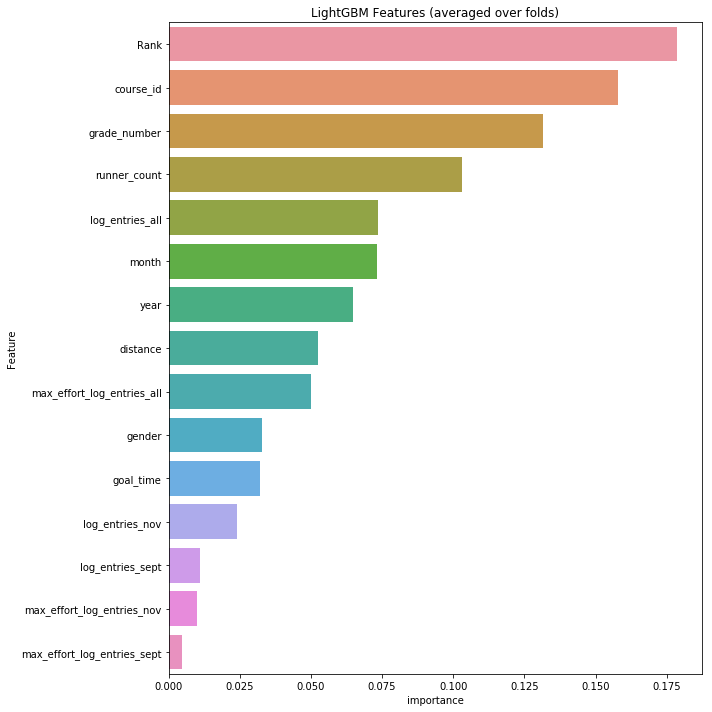

In [26]:
fold_importance_df=pd.DataFrame()
fold_importance_df['Feature']=df.tail(5).drop("race_diff",axis=1).columns
feature_importance_df=pd.DataFrame()
fold_importance_df["importance"]=model.feature_importances_[:len(df.tail(5).columns)]
feature_importance_df=pd.concat([feature_importance_df, fold_importance_df], axis=0)
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:200].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
plt.figure(figsize=(10,10))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')